# Mercedes Price Dataset İnceleme

Veri setim Mercedes marka arabaların üretim tarihi, vites türü, kilometre, vergi ücreti, mpg (1 litre ile kaç km yol gittiği), motor hacmi ve aracın ücretini içermekte.

Bu veri setini kullanmadaki amacım Mercedes marka aracımın 2.el satış fiyatını belirlemek ve alıcılar için kolaylıklar sağlamak.
Aynı zamanda alacağım yeni aracın analizini yapabilmek.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
#uygulamamız sırasında kullanacağımız kütüphaneleri en başta ekledik.

In [2]:
merc = pd.read_excel("merc.xlsx")
# excel üzerinden dataset imizi okuyoruz. Pandas kütüphanesini kullandık.

In [3]:
merc.head()
# Veri setini ekrana yazdırdık

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
# for döngüsü kullanarak veri setimizdeki yıl ve fiyat değerlerini inceledik
# Görüntü kirliliği olmaması için sadece ilk 20 satırını gösterdim
for index, row in merc.iterrows():
    print(f"Index: {index}, Year: {row['year']}, Price: {row['price']}")
    if index >= 19:
        print('Çok daha fazla satır var')
        break


Index: 0, Year: 2005, Price: 5200
Index: 1, Year: 2017, Price: 34948
Index: 2, Year: 2016, Price: 49948
Index: 3, Year: 2016, Price: 61948
Index: 4, Year: 2016, Price: 73948
Index: 5, Year: 2011, Price: 149948
Index: 6, Year: 2018, Price: 30948
Index: 7, Year: 2012, Price: 10948
Index: 8, Year: 2019, Price: 139948
Index: 9, Year: 2017, Price: 19750
Index: 10, Year: 2020, Price: 32980
Index: 11, Year: 2020, Price: 26980
Index: 12, Year: 2019, Price: 23750
Index: 13, Year: 2019, Price: 67980
Index: 14, Year: 2016, Price: 18980
Index: 15, Year: 2017, Price: 15890
Index: 16, Year: 2017, Price: 19890
Index: 17, Year: 2019, Price: 56800
Index: 18, Year: 2017, Price: 17513
Index: 19, Year: 2014, Price: 15701
Çok daha fazla satır var


In [13]:
count_limit = 20  # Sınır değeri
# Çok eleman olduğu için hepsini göstermek istemedim
# For döngüsü ve if kullanarak 2016 model arabaları incele
count = 0  # Sayaç başlangıcı
for index, row in merc.iterrows():
    if row['year'] == 2016:
        print(f"Index: {index}, Year: {row['year']}, Price: {row['price']}")
        count += 1  # Her 2016 model araç için sayaç arttır
        if count >= count_limit:
            print("Çok fazla eleman var.")
            break  # Belirli bir sınırı aştığında döngüyü sonlandır



Index: 2, Year: 2016, Price: 49948
Index: 3, Year: 2016, Price: 61948
Index: 4, Year: 2016, Price: 73948
Index: 14, Year: 2016, Price: 18980
Index: 21, Year: 2016, Price: 17672
Index: 26, Year: 2016, Price: 25077
Index: 29, Year: 2016, Price: 19328
Index: 60, Year: 2016, Price: 14480
Index: 77, Year: 2016, Price: 24880
Index: 96, Year: 2016, Price: 37385
Index: 104, Year: 2016, Price: 35371
Index: 134, Year: 2016, Price: 16480
Index: 136, Year: 2016, Price: 25780
Index: 138, Year: 2016, Price: 17800
Index: 140, Year: 2016, Price: 17890
Index: 146, Year: 2016, Price: 19498
Index: 149, Year: 2016, Price: 28498
Index: 153, Year: 2016, Price: 27995
Index: 157, Year: 2016, Price: 29995
Index: 164, Year: 2016, Price: 20298
Çok fazla eleman var.


In [6]:
# Daha net inceleyebilmek için 2016 senesindeki ve diğer senelerdeki
# araçların ortalama fiyalarını gösteren bir fonksiyon yazdım.

# Yıl bazında ortalama fiyat hesaplayan fonksiyon
def ortalama_fiyat_yila_gore(dataframe):
    return dataframe.groupby('year')['price'].mean()

print("Yıl Bazında Ortalama Fiyatlar:")
print(ortalama_fiyat_yila_gore(merc))

# Bu fonksiyon ile veri setimdeki araçların yıl bazındaki fiyat ortalamalarını inceledim

Yıl Bazında Ortalama Fiyatlar:
year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64


In [7]:
# kendi aracımın detaylarını biraz daha ekledim ve karşıma çıkan sonuçları biraz daha sınırlandırdım
filtre = (merc['year'] == 2016) & (merc['mpg'] < 50) & (merc['transmission'] == 'Automatic') & (merc['engineSize'] < 2.5) & (merc ['mileage'] < 30000)
sonuclar = merc[filtre]

print("Sonuçlar:")
print(sonuclar)

Sonuçlar:
       year  price transmission  mileage  tax   mpg  engineSize
153    2016  27995    Automatic    13000  200  40.9         2.0
157    2016  29995    Automatic    27700  200  47.9         2.1
1067   2016  19798    Automatic    17567  200  42.8         2.0
1587   2016  28495    Automatic     9884  235  38.2         2.0
2149   2016  19297    Automatic    21761  200  43.5         2.0
2235   2016  27880    Automatic    11513  200  47.9         2.1
2251   2016  27685    Automatic    13656  200  47.9         2.1
2594   2016  25532    Automatic    15129  160  44.1         2.0
2689   2016  20677    Automatic    11868  200  43.5         2.0
3300   2016  22990    Automatic     6662  200  42.8         2.0
3748   2016  17991    Automatic    29446  160  44.8         2.0
3763   2016  19791    Automatic     6951  200  42.8         2.0
4676   2016  25290    Automatic    23274  160  44.1         2.0
6306   2016  32895    Automatic    20751  235  44.8         2.2
7876   2016  23991    Automati

In [8]:
filtre = (merc['year'] == 2016) & (merc['mpg'] < 50) & (merc['transmission'] == 'Automatic') & (merc['engineSize'] < 2.5) & (merc['mileage'] < 30000)
sonuclar = merc[filtre]

if not sonuclar.empty:
    ortalam_price = sonuclar['price'].mean()
    print(f"Filtrelenen araçların 'price' değerlerinin ortalaması: {ortalam_price}")
else:
    print("Filtreye uyan araç bulunamadı.")

Filtrelenen araçların 'price' değerlerinin ortalaması: 23465.217391304348


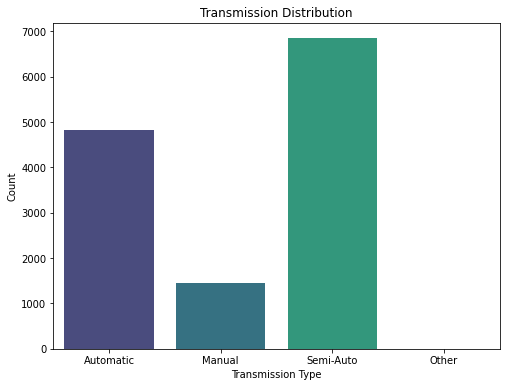

In [9]:
# Aracımın alıcılarının ilgisini kazanmak için elimdeki veri setinden
# matplotlib kütüphanesini kullanarak bir grafik ortaya çıkardım

# Aracımın ne kadar yaygın olduğu konusunda bilgi vermeyi amaçladım.
# Bu grafiği yorumladığımızda otomatik vites olan arabamın satış miktarının orta derecede olduğu görünüyor
# yani aracımı hem elden çıkarmak kolay, kullanımı kolay, hem de piyasası düşecek kadar yaygın değil
# Bunu satış dosyama ekleyebileceğimi düşündüm

# Bar grafiği
plt.figure(figsize=(8, 6))
sns.countplot(x='transmission', data=merc, palette='viridis')
plt.title('Transmission Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

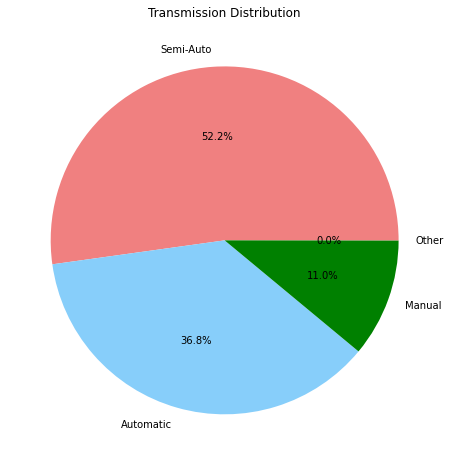

In [10]:
#Bu da koyabileceğim farklı bir seçenek

#Pasta Grafiği
plt.figure(figsize=(8, 8))
transmission_counts = merc['transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightskyblue','green'])
plt.title('Transmission Distribution')
plt.show()

In [11]:
# Aracımı sattıktan sonra almak istediğim araba otomatik vites 4 motorun üstünde bir mercedes jeep'ti
# bu yüzden istediğim doğrultuda filtreleyip ortalama fiyatı görüntüleedim

# 2020 model ve belirtilen koşulları sağlayan araçları filtrele
filtrelenmis_merc = merc[(merc['transmission'] == 'Automatic') & (merc['mpg'] > 4.0)]

# 'price' sütununu NumPy dizisine dönüştür
prices = filtrelenmis_merc['price'].values

# NumPy ile Ortalama fiyatı hesapla
ortalama_fiyat = np.mean(prices)

# Sonucu görüntüle
print(f"Mercedes Jeep Ortalama Fiyatı: {ortalama_fiyat}")

Mercedes Jeep Ortalama Fiyatı: 24404.991708126036


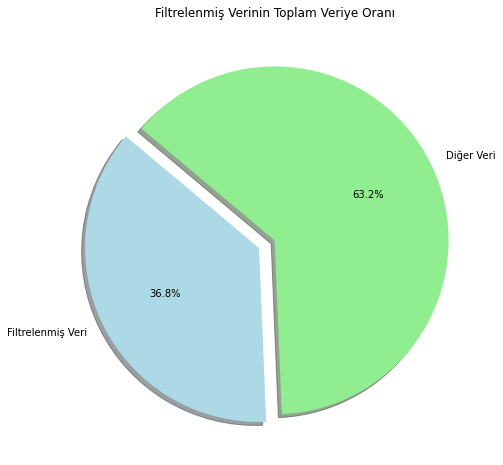

In [12]:
# Mercedes Jeep için isteklerim doğrultusunda Sahip olmam gereken parayı gördüm.
# Piyasada bu arabaların ne kadar tutulduğunu bir grafik üzerinden görmek istedim.

# Belirtilen koşulları sağlayan araçları filtrele
filtrelenmis_merc = merc[(merc['transmission'] == 'Automatic') & (merc['mpg'] > 4.0)]

# Filtrelenmiş ve toplam veri setinin eleman sayılarını hesapla
filtrelenmis_sayi = len(filtrelenmis_merc)
toplam_sayi = len(merc)
kalan_sayi = toplam_sayi - filtrelenmis_sayi

# Pasta grafiği verileri
labels = ['Filtrelenmiş Veri', 'Diğer Veri']
sizes = [filtrelenmis_sayi, kalan_sayi]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Filtrelenmiş veriyi vurgula

# Pasta grafiğini çiz
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Filtrelenmiş Verinin Toplam Veriye Oranı')
plt.show()

## Ortaya çıkan sonuç benim için yeterliydi.

### Analiz sonucunda arabamı satabileceğim ortalama fiyatı gördüm.

### Arabamı satacağım alıcılar için çeşitli grafikler oluşturdum ve bu grafiklerin açıklamalarının alıcıların ilgisini çekebileceğini düşünüyorum.

### Arabamı sattıktan sonra almayı planladığım arabanın ortalama fiyatını inceledim ve artık gelecek planlarımı buna göre şekillendirebilirim.

### Planladığım arabanın özelliklerini verisetindeki diğer arabalarla karşılaştırdım ve bunu bir grafik ile önizledim. Elimde oluşan bu veri istediğim arabanın piyasadaki yeri hakkında bana bilgi sağladı.